In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

Рассмотрим матрицу $A$ размера 32х32, задаваемую следующей формулой 
\begin{equation}
A_{ij} = - \delta_{i,j} + \delta_{i,j-1} + \delta_{i,j-2}
\end{equation}

 Матрица имеет верхнетреугольный вид, поэтому спектр может состоять собственное число может равняться только $\lambda = -1$. $Rg(A-\lambda E) = 31$, значит существует одномерное собственное подпространство, натянутое на вектор $h = [0,0,0,...,0,1]^T$

 Используя функцию scipy.linalg.expm, построим $||e^{At}||_2$ как функцию $t$ на интервале $0 \leq t \leq 50$.

[[-1.  1.  1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  1.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


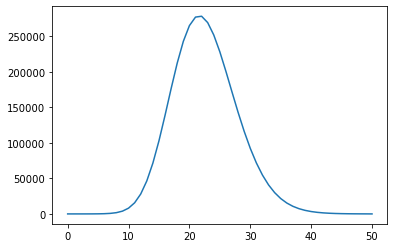

In [2]:
from scipy.linalg import expm
#Задаем единичную наддиагональ B
B = np.zeros((32,32))
for i in range (31):
   B[i,i+1]=1
 
A = -np.eye(32) + B + B@B
#Печатаем матрицу A
print(A)
 
### Собственные числа с учетом алгебраической кратностью. Заметим, что геометрическая кратность - 1
L = LA.eigvalsh(A)
print(L)


norms = np.zeros(51)
for t in range(50):
   norms[t]=LA.norm(expm(A*t), ord=2)

import matplotlib.pyplot as plt
plt.plot(np.arange(51),norms)

<a list of 5 text.Text objects>

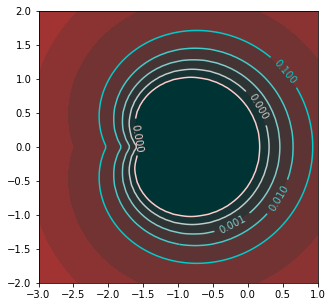

In [3]:
np.set_printoptions(precision=8, suppress=True)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))


B = np.zeros((32,32))
for i in range (31):
   B[i,i+1]=1

A = -np.eye(32) + B + B@B

def func (z):
  C = (z)*np.eye(32) - A
  U, S, Vh = np.linalg.svd(C)
  return np.min(S)

x = np.linspace(-3,1,100)
y = np.linspace(-2,2,100)
x, y = np.meshgrid(x,y)
#grid[-4:3:1000j, -3.75:3.75:1000j]
z = x + y*1j
#function = func(z)

function = np.zeros((100,100))
#print(function.size)
for i in range(100):
  for j in range(100):
    function[i,j]=func(z[i,j])

lev_region = [ 0,0.00001,0.0001,0.001,0.01,0.1,0.5,1, 2,5,10,20]
#  Задаем цвет каждой области:
color_fill = np.zeros((12, 3))
color_fill[:, 1:] = 0.2
color_fill[:, 0] = np.linspace(0, 1, 12)

ax.contourf(x, y, function,
            levels = lev_region,
            colors = color_fill)


###  Строим contour  ###
#  Задаем количество линий:
lev_line = [0.00001, 0.0001, 0.001, 0.01, 0.1]
#  Задаем цвет линий:
color_line = np.zeros((5, 3))
color_line[:, 1:] = 0.8
color_line[:, 0] = np.linspace(1, 0, 5)

CS = ax.contour(x, y, function,
                levels = lev_line,
                colors = color_line)

ax.clabel(CS)
